# <center> LSTM RNN </center>

---

This notebook implements a LSTM RNN through Tensorflow using Keras.

### Loading Neccessary Libraries

In [18]:

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt



---

We use the [IMDB dataset](https://keras.io/api/datasets/imdb/) 
provided in Keras to implement the LSTM model.
- This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
- Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.
- This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".


In [2]:

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


17465344/17464789 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [4]:
# How a datapoint looks like:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189


---

Since, reviews are of varying lengths, we pad each review so that they all become of same length.
- We use forward padding of 0s, which adds 0s at the starting of the reviews.
- Padding helps in implementing Batch Optimization in LSTMs.
  - This speeds up training.

In [5]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

### Splitting Data into Train, Test, and Validation Sets

In [6]:
# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (20000, 600)
20000 train samples
25000 test samples
5000 validation samples


### Building The Model

In [42]:
# Necessary model parameters:
epochs=10
batch_size=100


In [43]:
# create the model
embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_6 (LSTM)                (None, 2)                 280       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 160,315
Trainable params: 160,315
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),
                    callbacks=[checkpointer])


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 319s 16ms/step - loss: 0.6390 - accuracy: 0.6704 - val_loss: 0.5089 - val_accuracy: 0.8042

Epoch 00001: val_loss improved from inf to 0.50886, saving model to model.weights.best.hdf5
Epoch 2/10
20000/20000 [==============================] - 314s 16ms/step - loss: 0.4526 - accuracy: 0.8289 - val_loss: 0.4249 - val_accuracy: 0.8340

Epoch 00002: val_loss improved from 0.50886 to 0.42486, saving model to model.weights.best.hdf5
Epoch 3/10
20000/20000 [==============================] - 312s 16ms/step - loss: 0.3678 - accuracy: 0.8669 - val_loss: 0.3830 - val_accuracy: 0.8528

Epoch 00003: val_loss improved from 0.42486 to 0.38297, saving model to model.weights.best.hdf5
Epoch 4/10
20000/20000 [==============================] - 314s 16ms/step - loss: 0.3107 - accuracy: 0.8919 - val_loss: 0.4600 - val_accuracy: 0.7890

Epoch 00004: val_loss did not improve from 0.38297
Epoch 5/10
20000

---
#### Explaining each line of code to build the model:

> We start off by defininig some necessary model parameters such as:
  - batch_size: No. of datapoints taken in each batch, during the training process.
    - Why do we use batches of datapoints instead of all the datapoints at once for training?
      - Because:
        - It requires less memory.
        - Typically networks train faster with mini-batches.
          - That's because the weights update after each epoch.
  - epochs: No. of epochs(iterations over all the datapoints) for training.

> - Next, we define our model to be Sequetial().
  - An artificial neural network is a sequential model.
    - The Sequential model is a linear stack of layers.
- add() method is used to add a layer into the sequential model.

> Embedding layer turns positive integers (indexes) into dense vectors of fixed size.
  - We need an embedding layer because we have thousands of words, so we need a more efficient representation for our input data than one-hot encoded vectors.

> LSTM creates a LSTM RNN layer
  - We create a 128 layered deep LSTM

> 'Dense' implements the operation: output = activation(dot(input, kernel) + bias) 
  - Where:
    - activation() is the element-wise activation function passed as the activation argument,
    - kernel is a weights matrix created by the layer,
    - bias is a bias vector created by the layer (only applicable if use_bias is True).
  - output = activation(dot(input, kernel) + bias)
    - y = activation(WT. X + b)

> - Since, the LSTM model built is supposed to classify reviews in being positive and negative, which is basically a binary-class classification task:
  - Hence, we use Softmax activation function in the output layer.

> - summary() method prints the number of weight and bias(if use_bias is True) parameters calculated in each layer.

> - compile() method configures the learning process before training a model.
  - For optimizing the gradients, Adam optimizer is used.

> - Keras models are trained on Numpy arrays of input data and labels. 

> - ModelCheckpoint is used to save the best weights yeilded by the model.

> - For training a model, we typically use the  fit() method.
  - fit() method trains the model for a fixed number of epochs (iterations on a dataset).
    - It returns a History object.
    - History attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
  - Verbose:
    - verbose=0 shows nothing (silent)
    - verbose=1 shows an animated progress bar like this:
      - progres_bar: [ ==============> ]
    - verbose=2 mentions the number of epoch like this:
      - Epoch = 1/10

> - Finally, we evaluate the model on the test data via evaluate().

---

### Evaluating Model

In [45]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')


In [46]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.36925443228721616
Test accuracy: 0.8535199761390686


---
#### How to interpret loss and accuracy?

- Loss can be seen as a distance between the true values of the problem and the values predicted by the model.
  - Greater the loss is, more huge is the errors made on the data.

- Accuracy can be seen as the number of errors made on the data.

  That means :
  - a low accuracy and huge loss means:
    - the model made huge errors on a lot of data
  - a low accuracy but low loss means:
    - the model made little errors on a lot of data
  - a great accuracy with low loss means:
    - the model made low errors on a few data (best case)

---

- The function below is used to update the plots for each epoch and error.

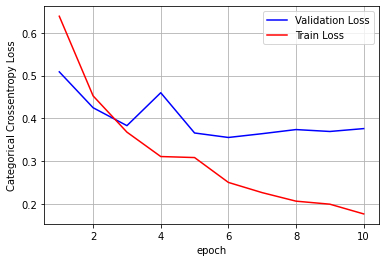

In [47]:

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)